<h1 style="text-align: center;">WSI - ćwiczenie 4. - SVM</h1>

## 1. Import bibliotek oraz przygotowanie danych:


In [1]:
%matplotlib ipympl

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
import pandas as pd
from kernel_SVM import SVM
from matplotlib import pyplot as plt
from experiment_conductor import ExperimentConductor, Parameter

data = pd.read_csv("exams.csv")
cols = [
    "gender",
    "race/ethnicity",
    "parental level of education",
    "lunch",
    "test preparation course",
]
pre = ["gender", "race", "parental_level", "lunch", "test_course"]
data = pd.get_dummies(data, columns=cols, prefix=pre, dtype=int)

data["is_passed"] = data.apply(
    lambda row: 1
    if row.iloc[0] > 60 and row.iloc[1] > 60 and row.iloc[2] > 60
    else -1,
    axis=1,
)
data = data.drop(["math score", "reading score", "writing score"], axis=1)

X = data.drop(["is_passed"], axis=1, inplace=False).values
y = data["is_passed"].values

## 2. Podział na dane do trenowania i testowania:

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. Trenowanie modelu:

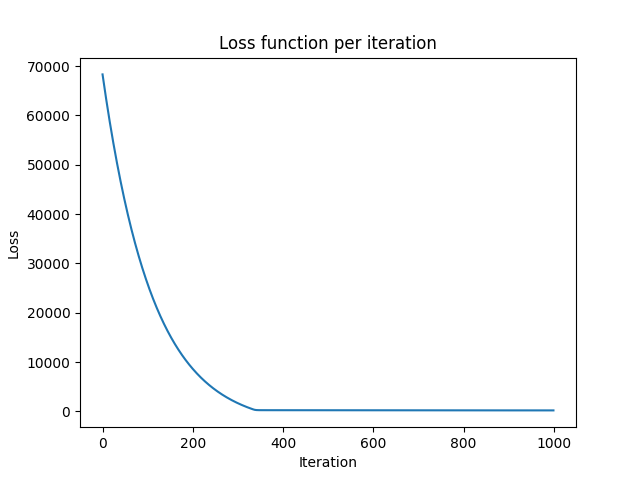

In [3]:
svm = SVM(kernel="rbf")
losses = svm.fit(X_train, y_train)

ax = plt.subplot(111)
ax.plot(losses)
ax.set_xlabel("Iteration")
ax.set_ylabel("Loss")
ax.set_title("Loss function per iteration")
plt.show()

## 4. Testowanie modelu:

In [4]:
y_pred = svm.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy:  0.68
Precision:  0.6857142857142857
Recall:  0.8275862068965517
Confusion matrix: 
 [[40 44]
 [20 96]]


## 5. Strojenie hiperparametrów:

### - Parametr regularyzacji

In [5]:
C_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.5, 1.8, 2, 2.2, 3, 5, 10]

exp_conductor = ExperimentConductor(X_train, y_train, X_test, y_test, kernel="rbf", C_values=C_values)

results = exp_conductor.tune_C()

#### Wykres przedstawiający dokładność, precyzję i czułość dla testowanych parametrów regularyzacji (dla radialnej funkcji jądrowej)

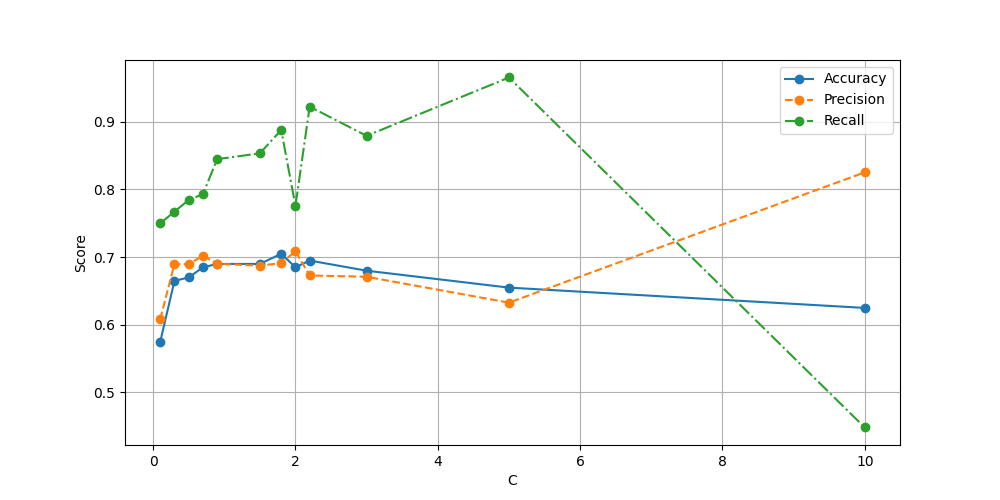

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(C_values, [result.accuracy for result in results], label="Accuracy", marker="o")
ax.plot(C_values, [result.precision for result in results], label="Precision", marker="o", linestyle="--")
ax.plot(C_values, [result.recall for result in results], label="Recall", marker="o", linestyle="-.")
plt.legend()
ax.set_xlabel("C")
ax.set_ylabel("Score")
ax.grid()
plt.show()

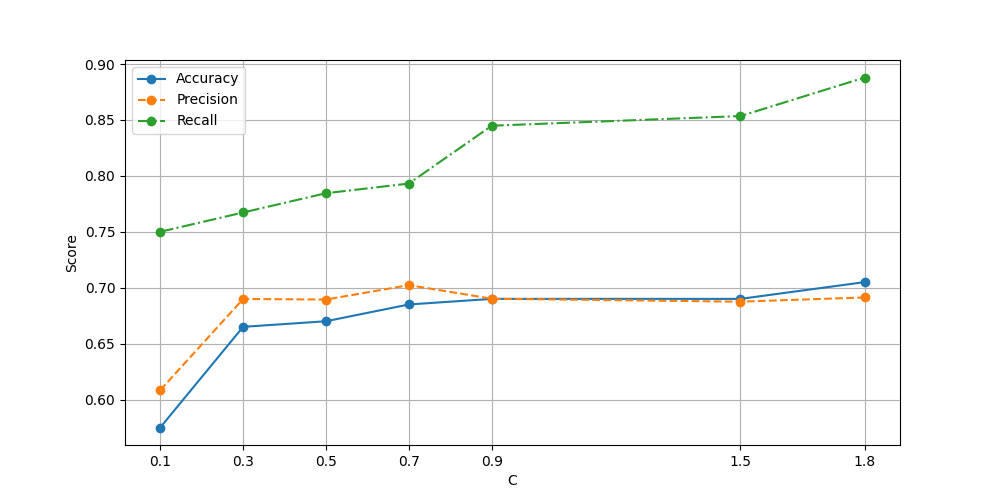

In [7]:


fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(C_values[:7], [result.accuracy for result in results[:7]], label="Accuracy", marker="o")
ax.plot(C_values[:7], [result.precision for result in results[:7]], label="Precision", marker="o", linestyle="--")
ax.plot(C_values[:7], [result.recall for result in results[:7]], label="Recall", marker="o", linestyle="-.")
plt.legend()
ax.set_xlabel("C")
ax.set_ylabel("Score")
ax.set_xticks(C_values[:7])
ax.grid()
plt.show()

#### Wnioski:
 - na podstawie wykresu widzimy, że największą dokładność model osiąga dla C = 0.7, wynosi ona nieco powyżej 70 procent
 
 - najbardziej precyzyjny model jest dla C = 10, natomiast dla takiej wartości parametru regularyzacji znacząco spada dokładność

### - parametr σ w radialnej funkcji jądrowej:

In [8]:
sigma_values = [0.001, 0.1, 0.3, 0.5, 0.7, 0.9, 1.5, 1.8, 2, 2.2, 3, 5, 10]

exp_conductor = ExperimentConductor(X_train, y_train, X_test, y_test, kernel="rbf", sigma_values=sigma_values)

results = exp_conductor.tune_sigma()

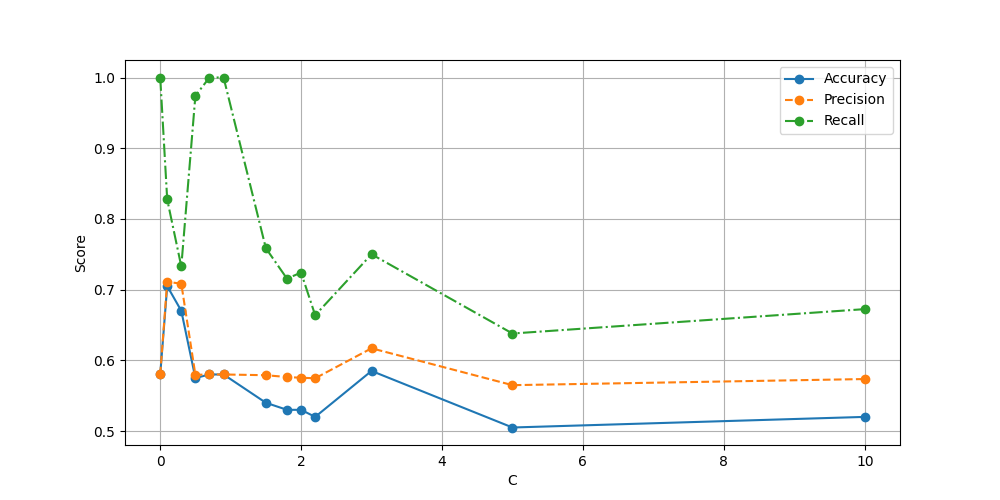

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(sigma_values, [result.accuracy for result in results], label="Accuracy", marker="o")
ax.plot(sigma_values, [result.precision for result in results], label="Precision", marker="o", linestyle="--")
ax.plot(sigma_values, [result.recall for result in results], label="Recall", marker="o", linestyle="-.")
plt.legend()
ax.set_xlabel("C")
ax.set_ylabel("Score")
ax.grid()
plt.show()

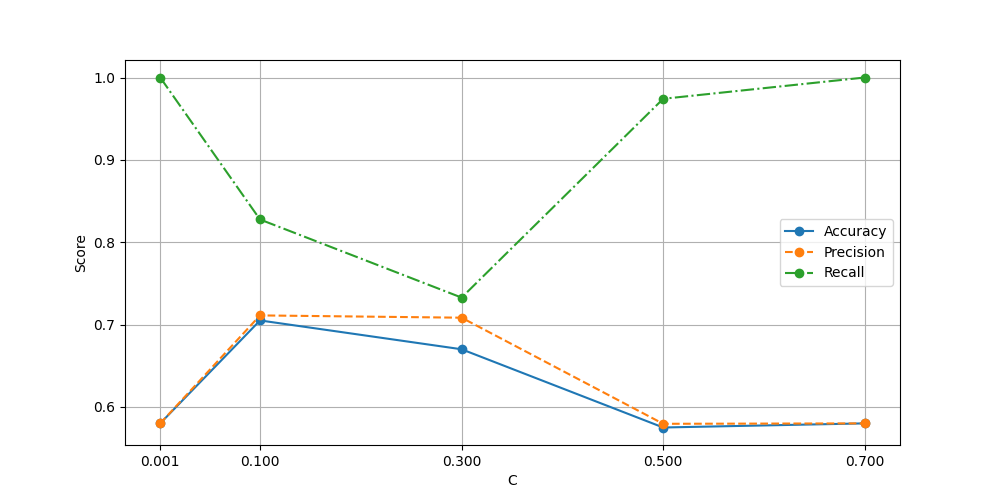

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(sigma_values[:5], [result.accuracy for result in results[:5]], label="Accuracy", marker="o")
ax.plot(sigma_values[:5], [result.precision for result in results[:5]], label="Precision", marker="o", linestyle="--")
ax.plot(sigma_values[:5], [result.recall for result in results[:5]], label="Recall", marker="o", linestyle="-.")
plt.legend()
ax.set_xlabel("C")
ax.set_ylabel("Score")
ax.set_xticks(sigma_values[:5])
ax.grid()
plt.show()

#### Wnioski:
 - na podstawie wykresów widzimy, że największą dokładność model osiąga dla σ = 0.1

## 6. Wielokrotne przeprowadzenie eksperymentu dla radialnej funkcji jądrowej:

In [11]:
NUMBER_OF_EXPERIMENTS = 20

exp_conductor = ExperimentConductor(X_train, y_train, X_test, y_test, kernel="rbf")
results = exp_conductor.conduct_experiment(NUMBER_OF_EXPERIMENTS)

avg_accuracy = sum([result.accuracy for result in results]) / NUMBER_OF_EXPERIMENTS
avg_precision = sum([result.precision for result in results]) / NUMBER_OF_EXPERIMENTS
avg_recall = sum([result.recall for result in results]) / NUMBER_OF_EXPERIMENTS

print("Average accuracy: ", avg_accuracy)
print("Average precision: ", avg_precision)
print("Average recall: ", avg_recall)

Average accuracy:  0.6937499999999999
Average precision:  0.6965864847697874
Average recall:  0.8362068965517242


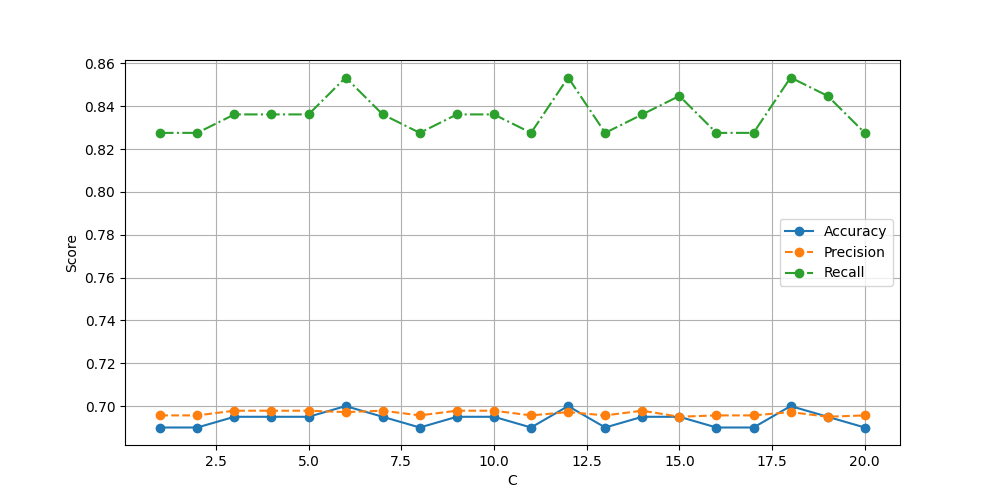

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(range(1, NUMBER_OF_EXPERIMENTS + 1), [result.accuracy for result in results], label="Accuracy", marker="o")
ax.plot(range(1, NUMBER_OF_EXPERIMENTS + 1), [result.precision for result in results], label="Precision", marker="o", linestyle="--")
ax.plot(range(1, NUMBER_OF_EXPERIMENTS + 1), [result.recall for result in results], label="Recall", marker="o", linestyle="-.")
plt.legend()
ax.set_xlabel("C")
ax.set_ylabel("Score")
ax.grid()
plt.show()

## 7. Wielokrotne przeprowadzenie eksperymentu dla liniowej funkcji jądrowej:

In [13]:
NUMBER_OF_EXPERIMENTS = 20

exp_conductor = ExperimentConductor(X_train, y_train, X_test, y_test, kernel="linear")
results = exp_conductor.conduct_experiment(NUMBER_OF_EXPERIMENTS)

avg_accuracy = sum([result.accuracy for result in results]) / NUMBER_OF_EXPERIMENTS
avg_precision = sum([result.precision for result in results]) / NUMBER_OF_EXPERIMENTS
avg_recall = sum([result.recall for result in results]) / NUMBER_OF_EXPERIMENTS

print("Average accuracy: ", avg_accuracy)
print("Average precision: ", avg_precision)
print("Average recall: ", avg_recall)

Average accuracy:  0.60625
Average precision:  0.7313253070862409
Average recall:  0.6241379310344827


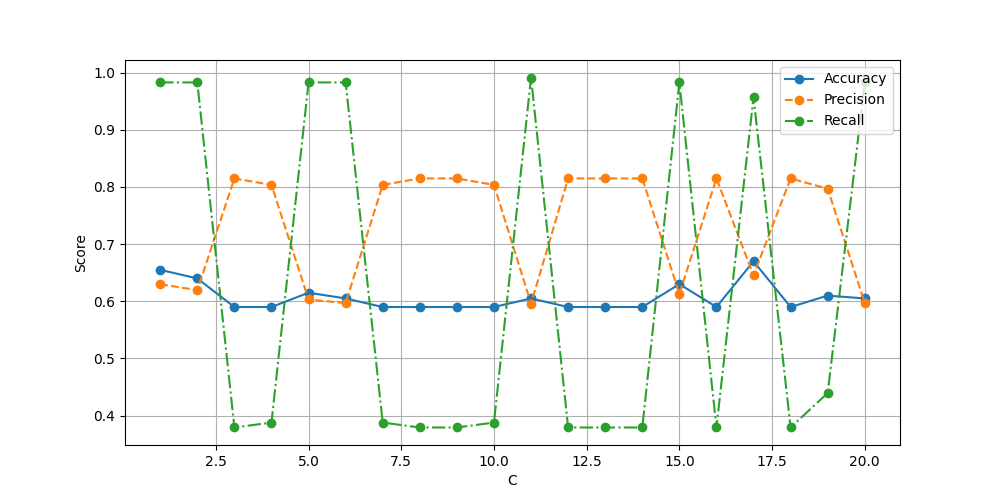

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(range(1, NUMBER_OF_EXPERIMENTS + 1), [result.accuracy for result in results], label="Accuracy", marker="o")
ax.plot(range(1, NUMBER_OF_EXPERIMENTS + 1), [result.precision for result in results], label="Precision", marker="o", linestyle="--")
ax.plot(range(1, NUMBER_OF_EXPERIMENTS + 1), [result.recall for result in results], label="Recall", marker="o", linestyle="-.")
plt.legend()
ax.set_xlabel("C")
ax.set_ylabel("Score")
ax.grid()
plt.show()

## Wnioski:
 - Średnia dokładność modelu z radionalną funkcją jądrową przy 20 trenowaniach wyniosła niespełna 70 procent, natomiast z liniową funkcją około 61, co świadczy o tym, że dane nie są separowalne liniowo

 - dobór paramterów miał duży wpływ na rezultaty, najlepsze zostały osiągnięte dla C = 0.7 oraz σ = 0.1
